In [1]:
"""you have to pick and choose one of the regression data set form the below link and create end to end model by using tensorflow 2 .x api . this is your passion assignment , no need to do it if you have any problem , we will discuss in your class anyhow . 

Repo link to data :- 

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table"""

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from platform import python_version
print("Tensorflow version :{}".format(tf.__version__))
print("Python     version :{}".format(python_version()))
print("Numpy      version :{}".format(np.__version__))
print("Pandas     version :{}".format(pd.__version__))
#pd.show_versions()

Tensorflow version :2.3.0
Python     version :3.8.3
Numpy      version :1.18.5
Pandas     version :1.0.5


In [4]:
"""Data Set Information:

The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1

"""
electric_data=pd.read_csv("Data_for_UCI_named.csv")
electric_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
electric_data.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [6]:
electric_data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
electric_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

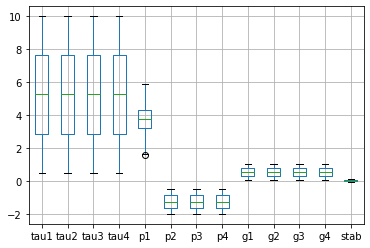

In [8]:
electric_data.boxplot()

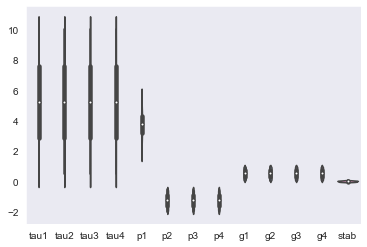

In [9]:
import seaborn as sns
sns.set_style("dark")
sns.violinplot(data=electric_data)

In [10]:
electric_data.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [11]:
stability=pd.get_dummies(electric_data["stabf"],drop_first=True)
stability.head()

,unstable
0,1
1,0
2,1
3,1
4,1


In [12]:
electric_data=pd.concat([electric_data,stability],axis=1)
electric_data=electric_data.drop(['stabf'],axis=1)
electric_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [13]:
electric_data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'unstable'],
      dtype='object')

In [14]:
electric_data=electric_data.reindex(columns=['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2','g3', 'g4','unstable','stab'])
electric_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,unstable,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1,0.049860


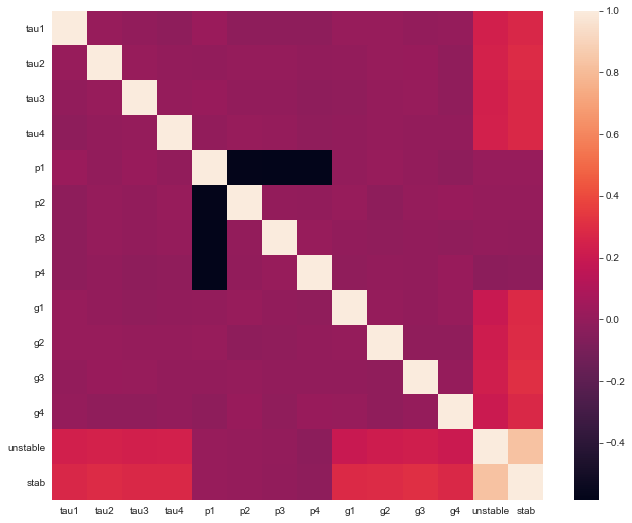

In [15]:
corr = electric_data.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

In [16]:
#sns.pairplot(electric_data,diag_kind='kde')

In [17]:
X=electric_data.iloc[:,0:13]
y=electric_data.iloc[:,13:14]

In [18]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [19]:

y

,stab
0,0.055347
1,-0.005957
2,0.003471
3,0.028871
4,0.049860
...,...
9995,0.023892
9996,-0.025803
9997,-0.031810
9998,0.037789


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-1.49711387, -0.54603513,  1.41477041, ...,  1.41210309,
         0.57030002, -1.32864425],
       [-0.70166297, -1.24490087, -0.18479772, ..., -1.51444521,
         0.45944048, -1.32864425],
       [-1.17012864,  1.70221269,  0.17747297, ...,  0.64797515,
         0.64742227,  0.75264692],
       ...,
       [-1.1692764 ,  0.42234217,  0.82683295, ...,  0.16431794,
        -1.35930097, -1.32864425],
       [-1.59806399,  0.16127779, -1.3447865 , ...,  1.20484343,
        -0.45137934, -1.32864425],
       [ 1.10695143, -1.26368613,  0.5996355 , ...,  1.27330604,
        -1.04670671,  0.75264692]])

In [23]:
import tensorflow  as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [24]:
"""model5 = tf.keras.models.Sequential([
  
 tf.keras.layers.Dense(128,activation=tf.nn.relu),
 tf.keras.layers.Dense(512,activation=tf.nn.relu),
 tf.keras.layers.Dense(64,activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(1)
])
model5.build(X_train.shape)
model5.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
"""

"model5 = tf.keras.models.Sequential([\n  \n tf.keras.layers.Dense(128,activation=tf.nn.relu),\n tf.keras.layers.Dense(512,activation=tf.nn.relu),\n tf.keras.layers.Dense(64,activation=tf.nn.relu),\n tf.keras.layers.Dropout(0.2),\n tf.keras.layers.Dense(1)\n])\nmodel5.build(X_train.shape)\nmodel5.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])\n"

In [27]:
#model5.summary()

In [28]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units =128,kernel_initializer='he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
model.add(Dense(units = 512, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the third hidden layer
model.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [29]:
model_history=model.fit(X_train, y_train,validation_split=0.25, batch_size = 100,epochs = 100)

Epoch 1/100
60/60 [==============================] - 1s 11ms/step - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/100
60/60 [==============

Epoch 48/100
60/60 [==============================] - 0s 4ms/step - loss: 7.7003e-05 - mean_squared_error: 7.7003e-05 - val_loss: 1.9834e-04 - val_mean_squared_error: 1.9834e-04
Epoch 49/100
60/60 [==============================] - 0s 4ms/step - loss: 7.6066e-05 - mean_squared_error: 7.6066e-05 - val_loss: 1.9796e-04 - val_mean_squared_error: 1.9796e-04
Epoch 50/100
60/60 [==============================] - 0s 4ms/step - loss: 7.3651e-05 - mean_squared_error: 7.3651e-05 - val_loss: 2.0663e-04 - val_mean_squared_error: 2.0663e-04
Epoch 51/100
60/60 [==============================] - 0s 4ms/step - loss: 7.4828e-05 - mean_squared_error: 7.4828e-05 - val_loss: 1.9570e-04 - val_mean_squared_error: 1.9570e-04
Epoch 52/100
60/60 [==============================] - 0s 4ms/step - loss: 7.1565e-05 - mean_squared_error: 7.1565e-05 - val_loss: 1.8758e-04 - val_mean_squared_error: 1.8758e-04
Epoch 53/100
60/60 [==============================] - 0s 4ms/step - loss: 7.4327e-05 - mean_squared_error: 7.4

60/60 [==============================] - 0s 4ms/step - loss: 3.8883e-05 - mean_squared_error: 3.8883e-05 - val_loss: 1.2069e-04 - val_mean_squared_error: 1.2069e-04
Epoch 95/100
60/60 [==============================] - 0s 4ms/step - loss: 3.9803e-05 - mean_squared_error: 3.9803e-05 - val_loss: 1.2172e-04 - val_mean_squared_error: 1.2172e-04
Epoch 96/100
60/60 [==============================] - 0s 4ms/step - loss: 3.9106e-05 - mean_squared_error: 3.9106e-05 - val_loss: 1.3295e-04 - val_mean_squared_error: 1.3295e-04
Epoch 97/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7211e-05 - mean_squared_error: 3.7211e-05 - val_loss: 1.1811e-04 - val_mean_squared_error: 1.1811e-04
Epoch 98/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7004e-05 - mean_squared_error: 3.7004e-05 - val_loss: 1.3213e-04 - val_mean_squared_error: 1.3213e-04
Epoch 99/100
60/60 [==============================] - 0s 4ms/step - loss: 3.8552e-05 - mean_squared_error: 3.8552e-05 - val

In [30]:
model_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


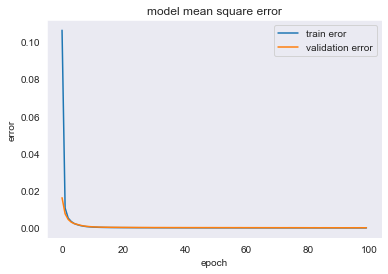

In [31]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('model mean square error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train eror', 'validation error'], loc='upper right')
plt.show()

In [32]:
predicts_out=model.predict(X_test)

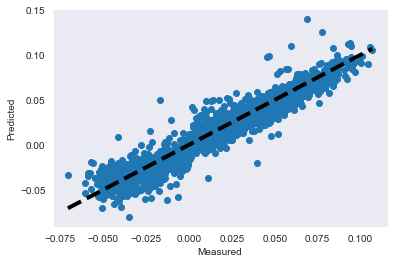

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicts_out)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [42]:
#model.evaluate
m = tf.keras.metrics.MeanSquaredError()
m.update_state(y_test,predicts_out)
m.result().numpy()

0.00012528413

In [45]:
y_test.shape,predicts_out.shape

((2000, 1), (2000, 1))

In [46]:
pred=pd.DataFrame(columns=['predict_stab'],data=predicts_out)

In [48]:
dfy=y_test.reset_index()
test_pred=pd.concat([dfy,pred],axis=1)

In [49]:
test_pred

,index,stab,predict_stab
0,9394,0.020872,0.017335
1,898,-0.020087,-0.039079
2,2398,0.025571,0.021627
3,5906,0.036796,0.034283
4,2343,0.046667,0.047916
...,...,...,...
1995,1037,0.048055,0.053943
1996,2899,0.028220,0.035694
1997,9549,-0.015051,-0.018980
1998,2740,0.027445,0.019598


In [52]:
from datetime import *
import sys
!mkdir -p saved_model
model.save('saved_model/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [53]:
model.save('saved_model/my_model/my_model.h5')